In [3]:
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%load_ext autoreload
%autoreload 2
%matplotlib inline
import features
import utils
import test
import train

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Visualize Feature Extraction

In [5]:
path = "../INRIAPerson/train_64x128_H96/pos/crop001001a.png"

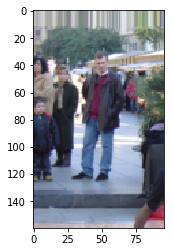

In [8]:
# Image without cropping
img = utils.load_image(path, crop = False)
plt.imshow(img)

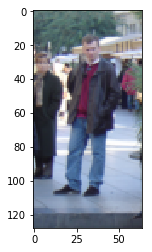

In [10]:
# Cropped image to 64 x 128 pixels
# We will use this cropped image to train the model
cimg = utils.load_image(path, crop = True)
plt.imshow(cimg)

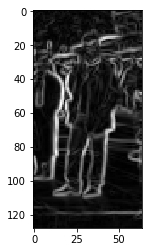

In [11]:
# Compute graident with the sobel operator
mag, theta = features.gradient(cimg)
plt.imshow(mag, cmap = "gray")

In [19]:
# Extract feature descriptors for the detector window 
# 1. bin the gradient
# 2. each cell vote for the orientations -> (9,) vector associated with each cell
# 3. contrast normalization for each block
fd = features.HOG(cimg)

In [20]:
# Check feature dimension
fd.shape

(3780,)

## Unit test for IOU

In [447]:
save_examples = "results"

In [367]:
def test_iou(cor_a, cor_b):
    black = np.zeros(detect.shape)
    black[cor_a[0] : cor_a[0] + 5, cor_a[1] : cor_a[3]] = [1, 0, 0]
    black[cor_a[2] - 5 : cor_a[2], cor_a[1] : cor_a[3]] = [1, 0, 0]
    black[cor_a[0]: cor_a[2], cor_a[1] : cor_a[1] + 5] = [1, 0, 0]
    black[cor_a[0]: cor_a[2], cor_a[3] - 5: cor_a[3]] = [1, 0, 0]

    black[cor_b[0] : cor_b[0] + 5, cor_b[1] : cor_b[3]] = [1, 0, 0]
    black[cor_b[2] - 5 : cor_b[2], cor_b[1] : cor_b[3]] = [1, 0, 0]
    black[cor_b[0] : cor_b[2], cor_b[1] : cor_b[1] + 5] = [1, 0, 0]
    black[cor_b[0] : cor_b[2], cor_b[3] - 5 : cor_b[3]] = [1, 0, 0]
    
    plt.imshow(black)
    test.iou(cor_a, cor_b)

cor_a: (336, 1072, 464, 1136), cor_b: (336, 1088, 464, 1152)
area a: 8192, area b: 8192
row intersection: 128, col intersection: 48
intersection: 6144
iou score: 0.6


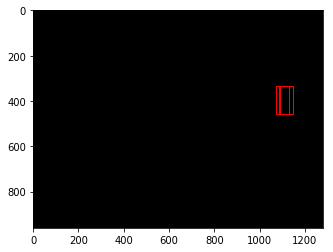

In [375]:
test_iou((336, 1072, 464, 1136), (336, 1088, 464, 1152))

## Pedestrian Detection for a single image

In [330]:
filename = "../INRIAPerson/Test/pos/crop001514.png"
img_id = filename.split("/")[-1].split(".")[0]

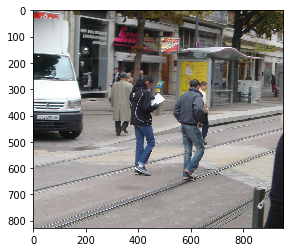

In [331]:
img = utils.load_image(filename, crop = False)
plt.imshow(img)

In [333]:
# with ground truth label visualized
detect, score = test.recognize(filename, level = 2, wsize = (128, 64), ratio = (2, 2), \
                               stride = 8, compare = True, width=5, top_k = 10, nonmax = True)

/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


labels: [(246, 367, 629, 467), (234, 291, 479, 381), (258, 533, 645, 663)]


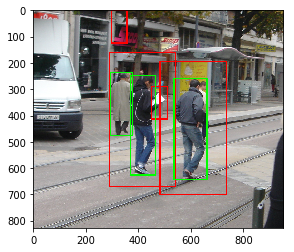

In [334]:
# with nonmax suppression
plt.imshow(detect)

In [335]:
filename = "../INRIAPerson/Test/pos/crop001512.png"
img_id = filename.split("/")[-1].split(".")[0]

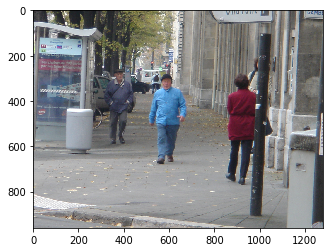

In [336]:
img = utils.load_image(filename, crop = False)
plt.imshow(img)

In [337]:
# with ground truth label visualized
detect, score = test.recognize(filename, level = 2, wsize = (128, 64), ratio = (2, 2), \
                               stride = 8, compare = True, width=5, top_k = 30, nonmax = True)

/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


labels: [(276, 519, 676, 676), (261, 310, 597, 450), (277, 853, 769, 994)]


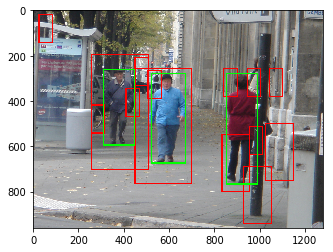

In [338]:
# with nonmax suppression
plt.imshow(detect)

In [350]:
filename = "../INRIAPerson/Test/neg/00001149.png"
img_id = filename.split("/")[-1].split(".")[0]

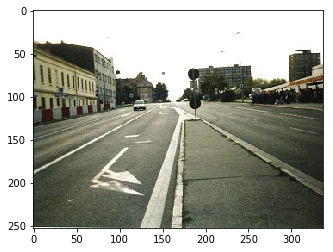

In [351]:
img = utils.load_image(filename, crop = False)
plt.imshow(img)

In [352]:
# with ground truth label visualized
detect, score = test.recognize(filename, level = 2, wsize = (128, 64), ratio = (2, 2), \
                               stride = 8, compare = False, width=5, nonmax = True)

/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


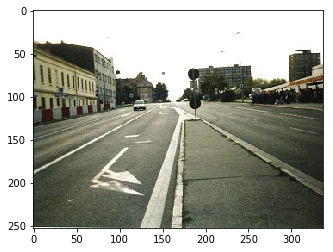

In [353]:
# with nonmax suppression
plt.imshow(detect)

## Test

In [587]:
test.precision_recall_test()

/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


top_k: None, threshold: 0, nonmax: True
image: ../INRIAPerson/Test/pos/crop_000001.png
correct: 0, wrong: 12
labels number: 1, detected number: 12
image: ../INRIAPerson/Test/pos/crop_000002.png
correct: 0, wrong: 3
labels number: 1, detected number: 3
image: ../INRIAPerson/Test/pos/crop_000003.png
skip
correct: 0, wrong: 4
labels number: 1, detected number: 4
image: ../INRIAPerson/Test/pos/crop_000004.png
skip
correct: 0, wrong: 5
labels number: 1, detected number: 5
image: ../INRIAPerson/Test/pos/crop_000005.png
skip
correct: 0, wrong: 5
labels number: 2, detected number: 5
image: ../INRIAPerson/Test/pos/crop_000006.png
correct: 0, wrong: 6
labels number: 1, detected number: 6
image: ../INRIAPerson/Test/pos/crop_000007.png
correct: 0, wrong: 6
labels number: 1, detected number: 6
image: ../INRIAPerson/Test/pos/crop_000008.png
correct: 0, wrong: 3
labels number: 1, detected number: 3
image: ../INRIAPerson/Test/pos/crop_000009.png
correct: 0, wrong: 3
labels number: 1, detected number: 

NameError: name 'precision' is not defined

In [510]:
label = "../INRIAPerson/Test/annotations/crop001607.txt"

In [511]:
l = test.load_labels(label)

In [409]:
# single test
precision, recall = test.precision_recall_test()

/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


top_k: None, threshold: 0.5, nonmax: True
test on positive examples
image: ../INRIAPerson/Test/pos/crop_000001.png
correct: 0, wrong: 0
labels number: 1, detected number: 0
[(66, 142), (646, 340)]
image: ../INRIAPerson/Test/pos/crop_000002.png
correct: 0, wrong: 0
labels number: 1, detected number: 0
[(80, 110), (469, 214)]
image: ../INRIAPerson/Test/pos/crop_000003.png
skip
correct: 0, wrong: 0
labels number: 1, detected number: 0
[(37, 316), (440, 434)]
image: ../INRIAPerson/Test/pos/crop_000004.png
skip
correct: 0, wrong: 0
labels number: 1, detected number: 0
[(53, 141), (347, 239)]
image: ../INRIAPerson/Test/pos/crop_000005.png
skip
correct: 0, wrong: 0
labels number: 2, detected number: 0
[(72, 171), (321, 260)]
[(60, 35), (320, 155)]
image: ../INRIAPerson/Test/pos/crop_000006.png
correct: 0, wrong: 2
labels number: 1, detected number: 2
[(91, 145), (626, 390)]
image: ../INRIAPerson/Test/pos/crop_000007.png
correct: 0, wrong: 0
labels number: 1, detected number: 0
[(113, 530), (5

In [270]:
pthre = precisions[:18] + precisions[49:67]

In [271]:
rthre = recalls[:18] + recalls[49: 67]

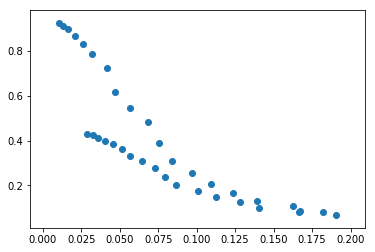

In [273]:
plt.scatter(rthre, pthre)

In [274]:
pmax = precisions[:48]
rmax = recalls[:48]

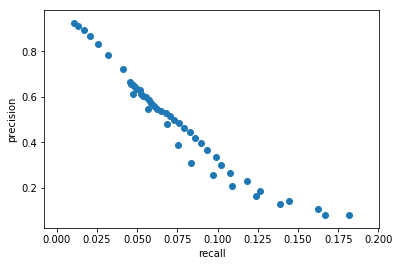

In [282]:
plt.scatter(rmax, pmax)
plt.ylabel("precision")
plt.xlabel("recall")
plt.savefig("writeup_img/pr_max.png")

In [276]:
pnonmax = precisions[48:]
rnonmax = recalls[48:]

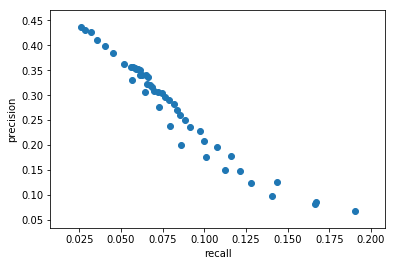

In [281]:
plt.scatter(rnonmax, pnonmax)
plt.ylabel("precision")
plt.xlabel("recall")
plt.savefig("writeup_img/pr_nonmax.png")

In [24]:
# test with iou_threshold = 0.4
precisions, recalls = test.meta_precision_recall(iou_threshold = 0.4)

THRESHOLD: -0.8, NONMAX: False


/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


precision: 0.9235993208828522, recall: 0.010541614184672027
precision: 0.9235993208828522, recall: 0.010541614184672027
precisions: [0.9235993208828522], recalls: [0.010541614184672027]
THRESHOLD: -0.7000000000000001, NONMAX: False
precision: 0.9134125636672326, recall: 0.01324764226441112
precision: 0.9134125636672326, recall: 0.01324764226441112
precisions: [0.9235993208828522, 0.9134125636672326], recalls: [0.010541614184672027, 0.01324764226441112]
THRESHOLD: -0.6000000000000001, NONMAX: False
precision: 0.8964346349745331, recall: 0.01663673315058134
precision: 0.8964346349745331, recall: 0.01663673315058134
precisions: [0.9235993208828522, 0.9134125636672326, 0.8964346349745331], recalls: [0.010541614184672027, 0.01324764226441112, 0.01663673315058134]
THRESHOLD: -0.5000000000000001, NONMAX: False
precision: 0.8675721561969439, recall: 0.02072854129482395
precision: 0.8675721561969439, recall: 0.02072854129482395
precisions: [0.9235993208828522, 0.9134125636672326, 0.896434634974

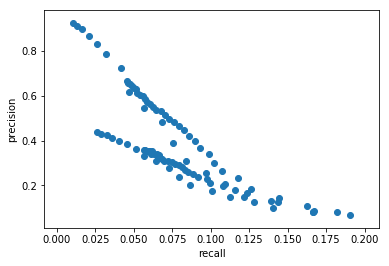

In [268]:
plt.scatter(recalls, precisions)
plt.ylabel("precision")
plt.xlabel("recall")
plt.savefig("writeup_img/pr_0.4.png")

In [27]:
precisions_5, recalls_5 = test.meta_precision_recall(iou_threshold = 0.5)

THRESHOLD: -0.8, NONMAX: False


/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


precision: 0.7826825127334465, recall: 0.008933242902819494
precision: 0.7826825127334465, recall: 0.008933242902819494
precisions: [0.7826825127334465], recalls: [0.008933242902819494]
THRESHOLD: -0.7000000000000001, NONMAX: False
precision: 0.7487266553480475, recall: 0.010859126837556327
precision: 0.7487266553480475, recall: 0.010859126837556327
precisions: [0.7826825127334465, 0.7487266553480475], recalls: [0.008933242902819494, 0.010859126837556327]
THRESHOLD: -0.6000000000000001, NONMAX: False
precision: 0.6893039049235993, recall: 0.01279263950593944
precision: 0.6893039049235993, recall: 0.01279263950593944
precisions: [0.7826825127334465, 0.7487266553480475, 0.6893039049235993], recalls: [0.008933242902819494, 0.010859126837556327, 0.01279263950593944]
THRESHOLD: -0.5000000000000001, NONMAX: False
precision: 0.6485568760611206, recall: 0.015495700146032776
precision: 0.6485568760611206, recall: 0.015495700146032776
precisions: [0.7826825127334465, 0.7487266553480475, 0.689303

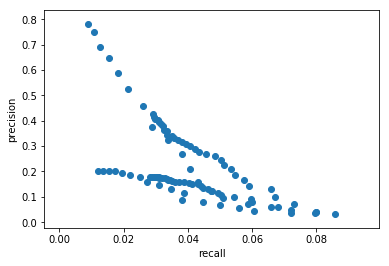

In [266]:
p = plt.scatter(recalls_5, precisions_5)
plt.ylabel("precision")
plt.xlabel("recall")
plt.savefig("writeup_img/pr_0.5.png")

In [259]:
precisions_3, recalls_3

([0.9711375212224108,
  0.969439728353141,
  0.967741935483871,
  0.9609507640067911,
  0.9286926994906621,
  0.9015280135823429,
  0.8455008488964346,
  0.7623089983022071,
  0.7045840407470289,
  0.6247877758913413,
  0.5365025466893039,
  0.4465195246179966,
  0.37521222410865873,
  0.30560271646859083,
  0.24448217317487267,
  0.19185059422750425,
  0.16298811544991512,
  0.13242784380305603,
  0.13921901528013583,
  0.22750424448217318,
  0.2869269949066214,
  0.35144312393887944,
  0.3904923599320883,
  0.4363327674023769,
  0.48047538200339557,
  0.5110356536502547,
  0.5466893039049237,
  0.5721561969439728,
  0.5908319185059423,
  0.6162988115449916,
  0.634974533106961,
  0.6485568760611206,
  0.6689303904923599,
  0.6825127334465195,
  0.6926994906621392,
  0.7011884550084889,
  0.7147707979626485,
  0.7283531409168081,
  0.7470288624787776,
  0.7572156196943973,
  0.7623089983022071,
  0.7707979626485568,
  0.7826825127334465,
  0.7860780984719864,
  0.7928692699490663,
  0